In [2]:
import pandas as pd 
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
len(df)


16598

In [5]:
len(df.columns)

11

In [6]:
df.shape

(16598, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Dealing with missing values 


# 1.Letwise Deletion delete rows that contain at least one missing value intead of creatin new db containing those changes 
# df.dropna(inplace=True) 


# 2. Dropping variables ifvariable has more than 60% missing values and the variable isn't essencial for the next step
# df=df.drop(['Name'], axis=1)

#3.Imputation: mean (numerical data) else mediand and  mode 
#df["NA_Sales"].filln(df["NA_Sales"].mean(), inplace=True)



In [9]:
corrM= df.corr()
corrM

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

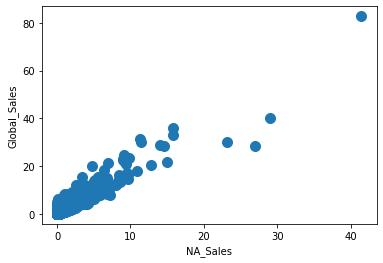

In [10]:
import matplotlib.pyplot as plt 
df.plot.scatter(x='NA_Sales', y='Global_Sales', s=100)


In [3]:
# One hot encoding
y= pd.get_dummies(df.Genre, prefix='Genre')
print(y)

       Genre_Action  Genre_Adventure  Genre_Fighting  Genre_Misc  \
0                 0                0               0           0   
1                 0                0               0           0   
2                 0                0               0           0   
3                 0                0               0           0   
4                 0                0               0           0   
...             ...              ...             ...         ...   
16593             0                0               0           0   
16594             0                0               0           0   
16595             0                0               0           0   
16596             0                0               0           0   
16597             0                0               0           0   

       Genre_Platform  Genre_Puzzle  Genre_Racing  Genre_Role-Playing  \
0                   0             0             0                   0   
1                   1             0  

In [ ]:
# essay
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.views))
print(z)
threshold = 3
print(np.where(z > 3))

In [ ]:
daa= pd.read_csv("videosUS.csv")
daa.views = daa.views[(z < 3).all(axis=0)]